In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('allseasons.csv')
df=df.drop(['Unnamed: 0'],axis=1)
df

,station_id,project,date,sampling_bout,gear,sample_grp,station,location,replicate,primers,...,White_catfish,Atl_salmon,Longitude,Latitude,Surface_Temp,Bottom_Temp,Surface_Salinity,Bottom_Salinity,temp_strat,salt_strat
0,NJOT_Feb_24_10,NJOT,2/1/24,Feb_24,edna,Trawl,10,B,1,bony,...,0.0,0.0,-74.568000,38.874000,5.956091,5.913677,30.449176,30.469612,0.042414,0.020436
1,NJOT_Feb_24_11,NJOT,2/1/24,Feb_24,edna,Trawl,11,B,1,bony,...,0.0,0.0,-74.618000,38.724000,6.265040,6.349604,30.647220,30.878290,0.084564,0.231070
2,NJOT_Feb_24_12,NJOT,2/1/24,Feb_24,edna,Trawl,12,B,1,bony,...,0.0,0.0,-74.672000,38.728000,6.141931,6.000855,30.286460,30.501550,0.141076,0.215090
3,NJOT_Feb_24_13,NJOT,2/1/24,Feb_24,edna,Trawl,13,B,1,bony,...,0.0,0.0,-74.928000,38.905000,5.563858,5.591211,30.637451,30.595319,0.027353,0.042131
4,NJOT_Feb_24_14,NJOT,2/1/24,Feb_24,edna,Trawl,14,B,1,bony,...,0.0,0.0,-74.969000,38.843000,5.451434,5.624359,29.023967,30.008847,0.172925,0.984880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,NJOT_Aug_23_93,NJOT,8/1/23,Aug_23,edna,Trawl,93,B,1,bony,...,0.0,0.0,-74.828700,38.954683,21.207851,20.596615,31.790128,31.808032,0.611236,0.017904
80,NJOT_Aug_23_94,NJOT,8/1/23,Aug_23,edna,Trawl,94,B,1,bony,...,0.0,0.0,-74.676950,39.141033,20.492487,18.477310,31.893909,31.978538,2.015177,0.084629
81,NJOT_Aug_23_95,NJOT,8/1/23,Aug_23,edna,Trawl,95,B,1,bony,...,0.0,0.0,-74.497300,39.165833,20.549352,16.286042,31.850125,32.115440,4.263310,0.265314
82,NJOT_Aug_23_97,NJOT,8/1/23,Aug_23,edna,Trawl,97,B,1,bony,...,0.0,0.0,-74.023817,39.357500,22.971803,14.291715,31.494135,32.288327,8.680087,0.794192


## Exploratory Data Analysis

#### Part 1: Temperature, salinity, and stratification avg by season

In [3]:
columns = ['Surface_Temp', 'Surface_Salinity', 'Bottom_Temp', 'Bottom_Salinity', 'temp_strat', 'salt_strat']

##change based off season
sliced_df=df.loc[df['sampling_bout']=='Jun_23']
# sliced_df=df.loc[df['sampling_bout']=='Aug_23']
sliced_df=df.loc[df['sampling_bout']=='Feb_24']
summary_stats = sliced_df[columns].describe()
summary_stats

,Surface_Temp,Surface_Salinity,Bottom_Temp,Bottom_Salinity,temp_strat,salt_strat
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,5.884859,28.815302,5.911421,30.052543,0.281400,1.240503
std,0.438544,2.181479,0.399104,0.876863,0.315077,1.656456
min,4.708212,22.594429,5.016651,27.461980,0.009290,0.000391
25%,5.581006,28.102602,5.609716,29.913880,0.082165,0.050269
50%,5.932552,29.741372,5.972974,30.263573,0.172925,0.231070
75%,6.126090,30.308458,6.139387,30.548435,0.311403,2.140432
max,6.775392,30.839665,6.736478,30.945559,1.333313,4.880312


Average Surface Temp (Feb, June, Aug): 5.88, 16.62, 22.23  
Average Surface Salinity: 28.815, 29.741, 30.581  
Average Temperature Stratification: 0.281, 2.518, 4.739

#### Part 2: Dimensionality Reduction using PCA/tSNE on Dataset (*with Oceanographic Data*)

In [4]:
fish_asvs = df.iloc[:, 11:]
fish_asvs
tsne_df = df
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=20, perplexity=20, learning_rate=5, n_iter=300) #test with diff perplexity
tsne_result = tsne.fit_transform(fish_asvs)
# Perform t-SNE

# Add t-SNE results to the dataframe
tsne_df['tSNE1'] = tsne_result[:, 0]
tsne_df['tSNE2'] = tsne_result[:, 1]
tsne_df


,station_id,project,date,sampling_bout,gear,sample_grp,station,location,replicate,primers,...,Longitude,Latitude,Surface_Temp,Bottom_Temp,Surface_Salinity,Bottom_Salinity,temp_strat,salt_strat,tSNE1,tSNE2
0,NJOT_Feb_24_10,NJOT,2/1/24,Feb_24,edna,Trawl,10,B,1,bony,...,-74.568000,38.874000,5.956091,5.913677,30.449176,30.469612,0.042414,0.020436,5.325099,-0.322492
1,NJOT_Feb_24_11,NJOT,2/1/24,Feb_24,edna,Trawl,11,B,1,bony,...,-74.618000,38.724000,6.265040,6.349604,30.647220,30.878290,0.084564,0.231070,5.116933,-0.176540
2,NJOT_Feb_24_12,NJOT,2/1/24,Feb_24,edna,Trawl,12,B,1,bony,...,-74.672000,38.728000,6.141931,6.000855,30.286460,30.501550,0.141076,0.215090,5.425777,-0.230078
3,NJOT_Feb_24_13,NJOT,2/1/24,Feb_24,edna,Trawl,13,B,1,bony,...,-74.928000,38.905000,5.563858,5.591211,30.637451,30.595319,0.027353,0.042131,5.230708,-0.631018
4,NJOT_Feb_24_14,NJOT,2/1/24,Feb_24,edna,Trawl,14,B,1,bony,...,-74.969000,38.843000,5.451434,5.624359,29.023967,30.008847,0.172925,0.984880,6.392591,-0.569975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,NJOT_Aug_23_93,NJOT,8/1/23,Aug_23,edna,Trawl,93,B,1,bony,...,-74.828700,38.954683,21.207851,20.596615,31.790128,31.808032,0.611236,0.017904,-5.925606,0.441053
80,NJOT_Aug_23_94,NJOT,8/1/23,Aug_23,edna,Trawl,94,B,1,bony,...,-74.676950,39.141033,20.492487,18.477310,31.893909,31.978538,2.015177,0.084629,-5.259864,0.077095
81,NJOT_Aug_23_95,NJOT,8/1/23,Aug_23,edna,Trawl,95,B,1,bony,...,-74.497300,39.165833,20.549352,16.286042,31.850125,32.115440,4.263310,0.265314,-4.943742,-1.166944
82,NJOT_Aug_23_97,NJOT,8/1/23,Aug_23,edna,Trawl,97,B,1,bony,...,-74.023817,39.357500,22.971803,14.291715,31.494135,32.288327,8.680087,0.794192,-3.802218,-2.505854


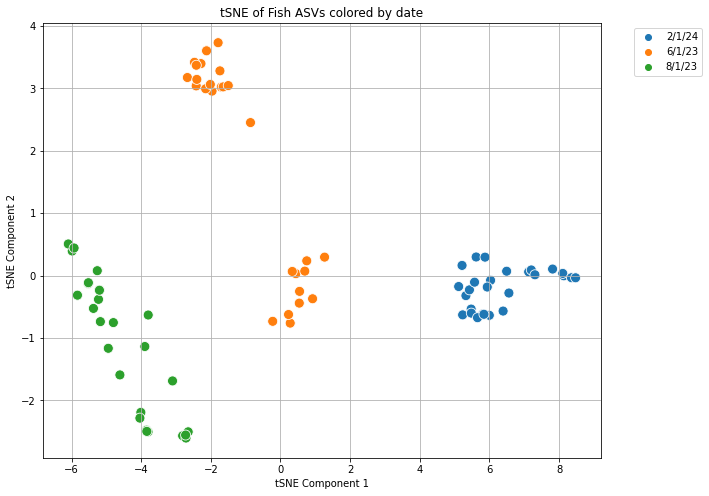

In [5]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(x='tSNE1', y='tSNE2', data=tsne_df, hue='date', s=100, palette='tab10')

plt.title('tSNE of Fish ASVs colored by date')
plt.xlabel('tSNE Component 1')
plt.ylabel('tSNE Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

## Build Model

Specifications for model: keep date, oceanographic variables.
If date is a strong predictor, influence of migratory species may be too high! Remove.

In [6]:
column_to_move = df.pop("date")
# insert column with insert(location, column_name, column_value)

df.insert(92, "date", column_to_move)
df


,station_id,project,sampling_bout,gear,sample_grp,station,location,replicate,primers,category,...,Latitude,Surface_Temp,Bottom_Temp,Surface_Salinity,Bottom_Salinity,temp_strat,salt_strat,date,tSNE1,tSNE2
0,NJOT_Feb_24_10,NJOT,Feb_24,edna,Trawl,10,B,1,bony,1,...,38.874000,5.956091,5.913677,30.449176,30.469612,0.042414,0.020436,2/1/24,5.325099,-0.322492
1,NJOT_Feb_24_11,NJOT,Feb_24,edna,Trawl,11,B,1,bony,1,...,38.724000,6.265040,6.349604,30.647220,30.878290,0.084564,0.231070,2/1/24,5.116933,-0.176540
2,NJOT_Feb_24_12,NJOT,Feb_24,edna,Trawl,12,B,1,bony,1,...,38.728000,6.141931,6.000855,30.286460,30.501550,0.141076,0.215090,2/1/24,5.425777,-0.230078
3,NJOT_Feb_24_13,NJOT,Feb_24,edna,Trawl,13,B,1,bony,1,...,38.905000,5.563858,5.591211,30.637451,30.595319,0.027353,0.042131,2/1/24,5.230708,-0.631018
4,NJOT_Feb_24_14,NJOT,Feb_24,edna,Trawl,14,B,1,bony,1,...,38.843000,5.451434,5.624359,29.023967,30.008847,0.172925,0.984880,2/1/24,6.392591,-0.569975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,NJOT_Aug_23_93,NJOT,Aug_23,edna,Trawl,93,B,1,bony,1,...,38.954683,21.207851,20.596615,31.790128,31.808032,0.611236,0.017904,8/1/23,-5.925606,0.441053
80,NJOT_Aug_23_94,NJOT,Aug_23,edna,Trawl,94,B,1,bony,1,...,39.141033,20.492487,18.477310,31.893909,31.978538,2.015177,0.084629,8/1/23,-5.259864,0.077095
81,NJOT_Aug_23_95,NJOT,Aug_23,edna,Trawl,95,B,1,bony,1,...,39.165833,20.549352,16.286042,31.850125,32.115440,4.263310,0.265314,8/1/23,-4.943742,-1.166944
82,NJOT_Aug_23_97,NJOT,Aug_23,edna,Trawl,97,B,1,bony,1,...,39.357500,22.971803,14.291715,31.494135,32.288327,8.680087,0.794192,8/1/23,-3.802218,-2.505854


In [7]:
## Keep date - modify existing code
## Plot feature importance
ml_df = df.iloc[:,10:] # type: ignore
ml_df = ml_df.drop(['tSNE1','tSNE2'],axis=1)
ml_df

,Atl_croaker_(nibea98),Bay_anchovy,Black_drum_or_Spot,Black_sea_bass,Brd_striped_anchovy,Little_tunny_or_skipjack_tuna,Nor_sea_robin,Scup,Smallmouth_flounder,Southern_kingfish(nibea95),...,Atl_salmon,Longitude,Latitude,Surface_Temp,Bottom_Temp,Surface_Salinity,Bottom_Salinity,temp_strat,salt_strat,date
0,0.000000,0.021454,0.040537,0.000000,0.000000,0.0,0.013350,0.000000,0.024768,0.006895,...,0.0,-74.568000,38.874000,5.956091,5.913677,30.449176,30.469612,0.042414,0.020436,2/1/24
1,0.000000,0.013388,0.009241,0.000000,0.000000,0.0,0.028128,0.000000,0.054104,0.000000,...,0.0,-74.618000,38.724000,6.265040,6.349604,30.647220,30.878290,0.084564,0.231070,2/1/24
2,0.030301,0.011375,0.013220,0.026649,0.000000,0.0,0.064406,0.020961,0.000000,0.006125,...,0.0,-74.672000,38.728000,6.141931,6.000855,30.286460,30.501550,0.141076,0.215090,2/1/24
3,0.002777,0.020035,0.002677,0.003510,0.000000,0.0,0.000000,0.005064,0.015582,0.000000,...,0.0,-74.928000,38.905000,5.563858,5.591211,30.637451,30.595319,0.027353,0.042131,2/1/24
4,0.016257,0.040472,0.004415,0.000487,0.000000,0.0,0.001678,0.000000,0.037753,0.000421,...,0.0,-74.969000,38.843000,5.451434,5.624359,29.023967,30.008847,0.172925,0.984880,2/1/24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.147357,0.033101,0.074028,0.028071,0.049606,0.0,0.126987,0.000000,0.006381,0.066560,...,0.0,-74.828700,38.954683,21.207851,20.596615,31.790128,31.808032,0.611236,0.017904,8/1/23
80,0.020967,0.034878,0.161804,0.012557,0.142219,0.0,0.053829,0.020391,0.016820,0.147087,...,0.0,-74.676950,39.141033,20.492487,18.477310,31.893909,31.978538,2.015177,0.084629,8/1/23
81,0.087133,0.044501,0.073490,0.046578,0.173540,0.0,0.082357,0.020870,0.024877,0.052247,...,0.0,-74.497300,39.165833,20.549352,16.286042,31.850125,32.115440,4.263310,0.265314,8/1/23
82,0.021997,0.065793,0.030653,0.041255,0.137145,0.0,0.336827,0.030375,0.014215,0.066587,...,0.0,-74.023817,39.357500,22.971803,14.291715,31.494135,32.288327,8.680087,0.794192,8/1/23


In [8]:
ml_df['date'] = pd.to_datetime(ml_df['date'], format='%m/%d/%y')
# Convert datetime to timestamp (e.g., number of days since a reference date)
ml_df['date_numeric'] = (ml_df['date'] - pd.Timestamp('1970-01-01')) // pd.Timedelta('1D')
ml_df

,Atl_croaker_(nibea98),Bay_anchovy,Black_drum_or_Spot,Black_sea_bass,Brd_striped_anchovy,Little_tunny_or_skipjack_tuna,Nor_sea_robin,Scup,Smallmouth_flounder,Southern_kingfish(nibea95),...,Longitude,Latitude,Surface_Temp,Bottom_Temp,Surface_Salinity,Bottom_Salinity,temp_strat,salt_strat,date,date_numeric
0,0.000000,0.021454,0.040537,0.000000,0.000000,0.0,0.013350,0.000000,0.024768,0.006895,...,-74.568000,38.874000,5.956091,5.913677,30.449176,30.469612,0.042414,0.020436,2024-02-01,19754
1,0.000000,0.013388,0.009241,0.000000,0.000000,0.0,0.028128,0.000000,0.054104,0.000000,...,-74.618000,38.724000,6.265040,6.349604,30.647220,30.878290,0.084564,0.231070,2024-02-01,19754
2,0.030301,0.011375,0.013220,0.026649,0.000000,0.0,0.064406,0.020961,0.000000,0.006125,...,-74.672000,38.728000,6.141931,6.000855,30.286460,30.501550,0.141076,0.215090,2024-02-01,19754
3,0.002777,0.020035,0.002677,0.003510,0.000000,0.0,0.000000,0.005064,0.015582,0.000000,...,-74.928000,38.905000,5.563858,5.591211,30.637451,30.595319,0.027353,0.042131,2024-02-01,19754
4,0.016257,0.040472,0.004415,0.000487,0.000000,0.0,0.001678,0.000000,0.037753,0.000421,...,-74.969000,38.843000,5.451434,5.624359,29.023967,30.008847,0.172925,0.984880,2024-02-01,19754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.147357,0.033101,0.074028,0.028071,0.049606,0.0,0.126987,0.000000,0.006381,0.066560,...,-74.828700,38.954683,21.207851,20.596615,31.790128,31.808032,0.611236,0.017904,2023-08-01,19570
80,0.020967,0.034878,0.161804,0.012557,0.142219,0.0,0.053829,0.020391,0.016820,0.147087,...,-74.676950,39.141033,20.492487,18.477310,31.893909,31.978538,2.015177,0.084629,2023-08-01,19570
81,0.087133,0.044501,0.073490,0.046578,0.173540,0.0,0.082357,0.020870,0.024877,0.052247,...,-74.497300,39.165833,20.549352,16.286042,31.850125,32.115440,4.263310,0.265314,2023-08-01,19570
82,0.021997,0.065793,0.030653,0.041255,0.137145,0.0,0.336827,0.030375,0.014215,0.066587,...,-74.023817,39.357500,22.971803,14.291715,31.494135,32.288327,8.680087,0.794192,2023-08-01,19570


In [9]:

from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
import numpy as np

## MULTI OUTPUT CLASSIFIER
import warnings
warnings.filterwarnings("ignore")

features = ml_df[['Surface_Salinity','Bottom_Salinity','salt_strat', 'Surface_Temp','Bottom_Temp','temp_strat']]

labels = ml_df.loc[:,'Atl_croaker_(nibea98)':'Atl_salmon'].applymap(lambda x: 1 if x > 0 else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Initialize and train the multi-output Random Forest classifier
rf_classifier = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

accuracies = []
precisions = []
recalls = []
f1_scores = []
for i, species in enumerate(labels.columns):
    accuracy = accuracy_score(y_test.iloc[:, i], y_pred[:, i])
    # precision = precision_score(y_test.iloc[:, i], y_pred[:, i])
    # recall = recall_score(y_test.iloc[:, i], y_pred[:, i])
    # f1 = f1_score(y_test.iloc[:, i], y_pred[:, i])
    
    accuracies.append(accuracy)

    print(f"Classification report for {species}:\n", classification_report(y_test.iloc[:, i], y_pred[:, i]))
    # print(f"Accuracy for {species}: {accuracy}")

# Calculate overall average accuracy across all species
average_accuracy = np.mean(accuracies)
average_accuracy

# # Evaluate the model
# for i, species in enumerate(labels.columns):
#     print(f"Classification report for {species}:\n", classification_report(y_test.iloc[:, i], y_pred[:, i]))

Classification report for Atl_croaker_(nibea98):
               precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.94      0.89      0.92        19

    accuracy                           0.88        26
   macro avg       0.85      0.88      0.86        26
weighted avg       0.89      0.88      0.89        26

Classification report for Bay_anchovy:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.92      1.00      0.96        24

    accuracy                           0.92        26
   macro avg       0.46      0.50      0.48        26
weighted avg       0.85      0.92      0.89        26

Classification report for Black_drum_or_Spot:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.92      1.00      0.96        23

    accuracy                           0.92  

0.8866943866943867

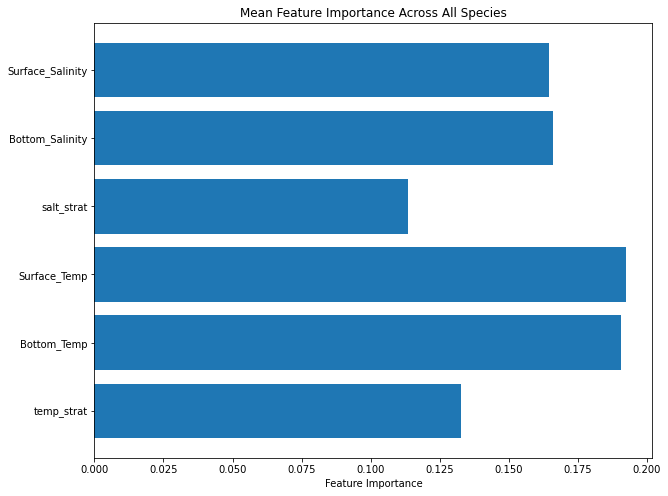

In [10]:
## Plot
feature_importance_df = pd.DataFrame() # type: ignore
for i, species in enumerate(labels.columns):
    importances = rf_classifier.estimators_[i].feature_importances_
    feature_importance_df[species] = importances

# Calculate mean feature importance across all species
feature_importance_df['mean_importance'] = feature_importance_df.mean(axis=1)

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(features.columns, feature_importance_df['mean_importance'])
plt.xlabel('Feature Importance')
plt.title('Mean Feature Importance Across All Species')
plt.gca().invert_yaxis()
plt.show()

### Ran without rare species

In [13]:
threshold = len(ml_df) * 0.2

# Count the non-zero occurrences of each species
species_columns = ml_df.columns[:-10]  # Adjust the slice to exclude non-species columns if needed
species_counts = (ml_df[species_columns] > 0).sum()
filtered_species = species_counts[species_counts >= threshold].index
filtered_df = ml_df[filtered_species]
non_species_columns = ml_df.columns[-10:]  # Adjust this if the non-species columns are at the end
filtered_df = pd.concat([filtered_df, ml_df[non_species_columns]], axis=1)
filtered_df = filtered_df.dropna()

filtered_df
filtered_ml_df = filtered_df
filtered_ml_df.to_csv('test')

In [22]:
## MULTI OUTPUT CLASSIFIER
import warnings
warnings.filterwarnings("ignore")

features = filtered_ml_df[['Surface_Temp','Bottom_Temp','Surface_Salinity','Bottom_Salinity','temp_strat','salt_strat']]
## with date
# features = ml_df[['Surface_Salinity','Bottom_Salinity','salt_strat', 'Surface_Temp','Bottom_Temp','temp_strat','date_numeric']]

labels = filtered_ml_df.loc[:,'Atl_croaker_(nibea98)':'Winter_or_Yellowtail_flounder'].applymap(lambda x: 1 if x > 0 else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize and train the multi-output Random Forest classifier
rf_classifier = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42
                                                            , min_samples_split=5, min_samples_leaf= 2, max_depth=None, bootstrap=True
                                                             ))
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

accuracies = []
precisions = []
recalls = []
f1_scores = []
for i, species in enumerate(labels.columns):
    accuracy = accuracy_score(y_test.iloc[:, i], y_pred[:, i])
    # precision = precision_score(y_test.iloc[:, i], y_pred[:, i])
    # recall = recall_score(y_test.iloc[:, i], y_pred[:, i])
    # f1 = f1_score(y_test.iloc[:, i], y_pred[:, i])
    
    accuracies.append(accuracy)

    print(f"Classification report for {species}:\n", classification_report(y_test.iloc[:, i], y_pred[:, i]))
    # print(f"Accuracy for {species}: {accuracy}")

# Calculate overall average accuracy across all species
average_accuracy = np.mean(accuracies)
average_accuracy

# # Evaluate the model
# for i, species in enumerate(labels.columns):
#     print(f"Classification report for {species}:\n", classification_report(y_test.iloc[:, i], y_pred[:, i]))

Classification report for Atl_croaker_(nibea98):
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      0.85      0.92        13

    accuracy                           0.88        17
   macro avg       0.83      0.92      0.86        17
weighted avg       0.92      0.88      0.89        17

Classification report for Bay_anchovy:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.94      1.00      0.97        16

    accuracy                           0.94        17
   macro avg       0.47      0.50      0.48        17
weighted avg       0.89      0.94      0.91        17

Classification report for Black_drum_or_Spot:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.94      1.00      0.97        16

    accuracy                           0.94  

0.8235294117647058

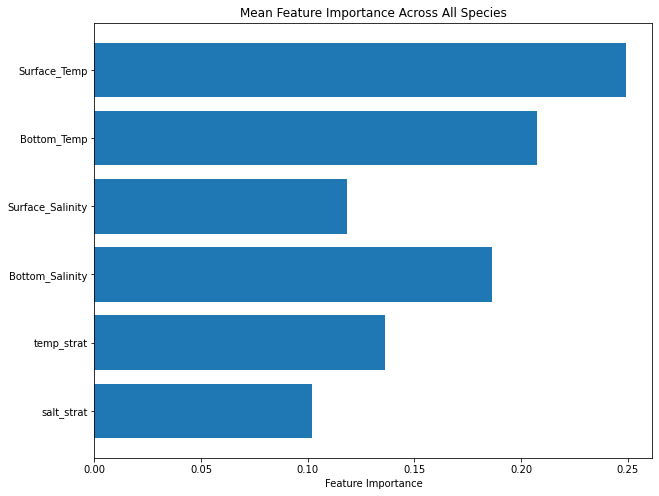

,Atl_croaker_(nibea98),Bay_anchovy,Black_drum_or_Spot,Black_sea_bass,Brd_striped_anchovy,Nor_sea_robin,Scup,Smallmouth_flounder,Southern_kingfish(nibea95),Str_sea_robin,...,Seaboard_goby,Silver_perch(nibea93),Sturgeon,Fourspot_flounder,Atl_silverside,Str_bass,Atl_mackerel,Silver_hake,Winter_or_Yellowtail_flounder,mean_importance
0,0.283581,0.192829,0.252217,0.175553,0.365349,0.218415,0.321966,0.230157,0.321727,0.258719,...,0.163175,0.225279,0.311034,0.263726,0.329782,0.279452,0.389440,0.241440,0.193526,0.249105
1,0.274492,0.161504,0.208456,0.265685,0.314190,0.228700,0.219031,0.197552,0.226261,0.203071,...,0.208982,0.151245,0.179179,0.157824,0.245689,0.353756,0.328618,0.156603,0.177427,0.207305
2,0.123645,0.106454,0.118987,0.178559,0.078112,0.110672,0.121413,0.139101,0.123581,0.102662,...,0.150153,0.144164,0.121366,0.110011,0.058968,0.062119,0.042815,0.105685,0.112896,0.118591
3,0.168825,0.172813,0.143942,0.198874,0.137825,0.137963,0.144284,0.142438,0.150628,0.162413,...,0.114150,0.233807,0.207714,0.206103,0.139285,0.214665,0.135876,0.216948,0.150211,0.186499
4,0.097783,0.188203,0.128635,0.113583,0.064936,0.202914,0.109163,0.187170,0.079935,0.176582,...,0.152105,0.122272,0.103433,0.178020,0.165363,0.061787,0.085054,0.180483,0.183189,0.136298
5,0.051675,0.178197,0.147763,0.067746,0.039588,0.101337,0.084142,0.103582,0.097869,0.096553,...,0.211435,0.123234,0.077274,0.084315,0.060913,0.028221,0.018197,0.098841,0.182751,0.102202


In [23]:

feature_importance_df = pd.DataFrame() # type: ignore
for i, species in enumerate(labels.columns):
    importances = rf_classifier.estimators_[i].feature_importances_
    feature_importance_df[species] = importances

# Calculate mean feature importance across all species
feature_importance_df['mean_importance'] = feature_importance_df.mean(axis=1)

# # Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(features.columns, feature_importance_df['mean_importance'])
plt.xlabel('Feature Importance')
plt.title('Mean Feature Importance Across All Species')
plt.gca().invert_yaxis()
plt.show()
importances
# feature_importance_df


## Hyperparameter tuning
Finding best combination of weights for model: tbd 7/19

In [17]:
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split 
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

#### Randomizedsearch

In [18]:
param_dist = {
    'estimator__n_estimators' : [50,100,200,500],
    'estimator__max_depth': [None, 10, 20, 30],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4],
    'estimator__bootstrap': [True, False]
}

rf_classifier = MultiOutputClassifier(RandomForestClassifier())
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)


randomized_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, n_iter=20, cv=3, random_state=42)
randomized_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params_rand = randomized_search.best_params_
best_model_rand = randomized_search.best_estimator_

# Evaluate the best model
y_pred_best_rand = best_model_rand.predict(X_test)
accuracy_best_rand = accuracy_score(y_test, y_pred_best_rand)
print(f"Best RF Accuracy: {accuracy_best_rand:.2f}")
print(f"Best Hyperparameters: {best_params_rand}")


Best RF Accuracy: 0.04
Best Hyperparameters: {'estimator__min_samples_split': 5, 'estimator__min_samples_leaf': 2, 'estimator__max_depth': None, 'estimator__bootstrap': True}


#### Gridsearch

Best parameters according to previous grid search: {'estimator__bootstrap': True, 'estimator__max_depth': None, 'estimator__max_features': 'auto', 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2}

Best Hyperparameters from Random Search: {'estimator__min_samples_split': 5, 'estimator__min_samples_leaf': 2, 'estimator__max_depth': None, 'estimator__bootstrap': True}

Define new grid based on Random search best params above

In [ ]:
features = ml_df[['Surface_Temp','Bottom_Temp','Surface_Salinity','Bottom_Salinity','temp_strat','salt_strat']]
labels = ml_df.loc[:,'Atl_croaker_(nibea98)':'Atl_salmon'].applymap(lambda x: 1 if x > 0 else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

rf_classifier = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, min_samples_leaf=2,min_samples_split=5,
                                                             max_depth=None,bootstrap=True,random_state=42))
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

accuracies = []
for i, species in enumerate(labels.columns):
    accuracy = accuracy_score(y_test.iloc[:, i], y_pred[:, i])
    accuracies.append(accuracy)

    print(f"Classification report for {species}:\n", classification_report(y_test.iloc[:, i], y_pred[:, i]))
    # print(f"Accuracy for {species}: {accuracy}")

# Calculate overall average accuracy across all species
average_accuracy = np.mean(accuracies)
average_accuracy
## avg accuracy of 88.9%, improvement of 0.1% from default